Лабораторная работа №2

Выполнила Аверьянова Александра

19-ИВТ-3

1 вариант

1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.
 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pass_data = pd.read_csv('titanic.csv')
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.Определите количество мужчин и женщин, которые ехали на корабле.

In [3]:
print('Number of men and woman on board: ')
len(pass_data.loc[pass_data.Sex == 'female']) + len(pass_data.loc[pass_data.Sex == 'male'])

Number of men and woman on board: 


891

2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.

In [4]:
print('Percentage of passengers who survived: ')
A = float(len(pass_data.loc[pass_data.Survived == True]))
B = float(len(pass_data))
A/B

Percentage of passengers who survived: 


0.3838383838383838

3.Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [5]:
print('Percentage of first class passengers: ')
A = float(len(pass_data.loc[pass_data.Pclass == 1]))
B = float(len(pass_data))
A/B

Percentage of first class passengers: 


0.24242424242424243

4.Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [6]:
df = pd.DataFrame(pass_data.Age)
print('Median: ')
M = df.median()
M

Median: 


Age    28.0
dtype: float64

In [7]:
print('Average: ')
A = df.mean()
A

Average: 


Age    29.699118
dtype: float64

5.Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Постройте плотность распределения признаков SibSp и Parch.

In [8]:
pass_data[["SibSp", "Parch"]].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


<AxesSubplot:ylabel='Density'>

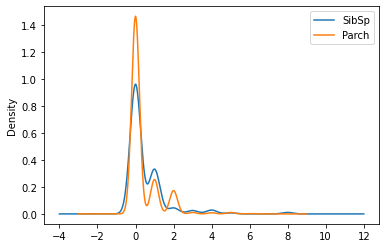

In [9]:
pass_data[["SibSp","Parch"]].plot.kde()

6.Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [10]:
import re

pass_data.query("Sex == 'female'")['Name']\
    .map(lambda string: re.sub(r'.+(Ms\.Miss\.|Mrs\.)|".+|\(".+"\)','',string))\
    .map(lambda string: re.sub(r'.*\(|\)', '',string))\
    .value_counts().head()

Hedwig                          1
 Florence                       1
Strom, Miss. Telma Matilda      1
Sage, Miss. Constance Gladys    1
Heininen, Miss. Wendla Maria    1
Name: Name, dtype: int64

7.Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [11]:
pass_data[["Survived","Pclass"]].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


8.Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

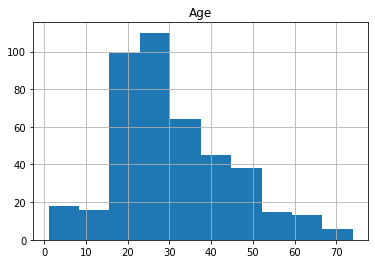

In [12]:
pass_data[["Age"]].loc[pass_data.Survived == False].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

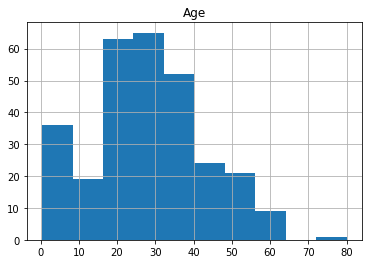

In [13]:
pass_data[["Age"]].loc[pass_data.Survived == True].hist()

Вывод: большинство пассажиров в возрасте от 0 до ~17 выжило. Наибольшей части погибших было около 25-30 лет.

9.Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.

1-й класс

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

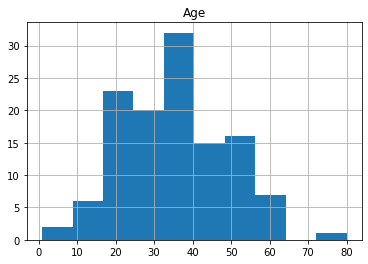

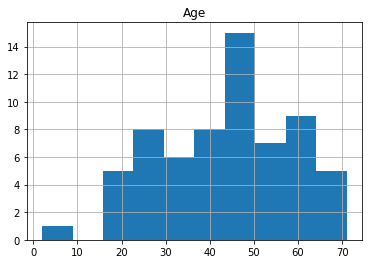

In [14]:
pass_data.query('Survived == True and Pclass == 1')[['Age']].hist()
pass_data.query('Survived == False and Pclass == 1')[['Age']].hist()

2-й класс

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

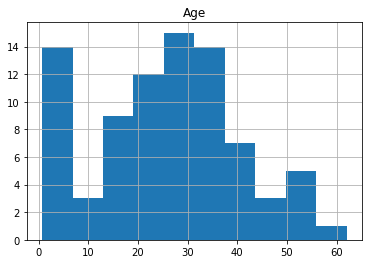

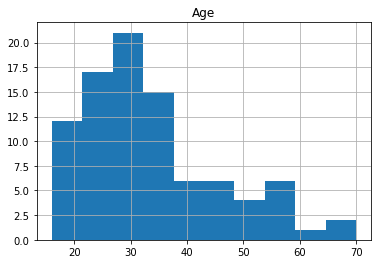

In [15]:
pass_data.query('Survived == True and Pclass == 2')[['Age']].hist()
pass_data.query('Survived == False and Pclass == 2')[['Age']].hist()

3-й класс

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

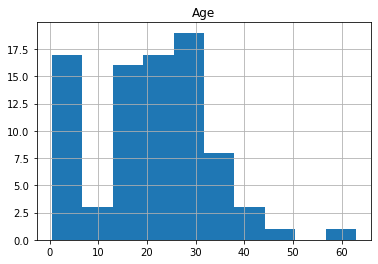

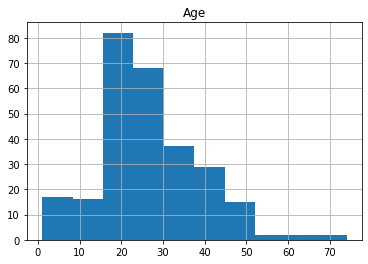

In [16]:
pass_data.query('Survived == True and Pclass == 3')[['Age']].hist()
pass_data.query('Survived == False and Pclass == 3')[['Age']].hist()

Вывод: выживших пассажиров больше в первом классе

10.Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети. 

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='sex', ylabel='count'>

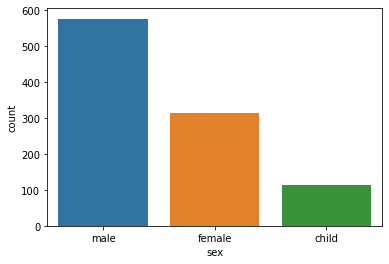

In [19]:
df = pd.DataFrame({
        'count': [
            len(pass_data.loc[pass_data.Sex == "male"]),
            len(pass_data.loc[pass_data.Sex == "female"]),
            len(pass_data.query("Age < 18"))
        ],
        'sex': [
            "male",
            "female",
            "child"
        ]
})
sns.barplot(data=df, y='count', x='sex')